#Multiclass Image Classification

10 classes of food

## 1. Import and become one with the data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#unzip dtaa
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

--2024-05-18 23:14:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.207, 172.217.194.207, 172.253.118.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  22.7MB/s    in 23s     

2024-05-18 23:15:08 (22.0 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 

In [3]:
#setup train and test directories

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"


In [32]:
# class names

import pathlib

import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
# class_names = np.array([item.name for item in data_dir.glob("*")])
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [5]:
#vizualize

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #set up target directory
  target_folder = target_dir + target_class
  #get ONE random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  #read the image and plot it
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  #print image shape
  print(f"Image shape {img.shape}")
  return img

Image shape (512, 384, 3)


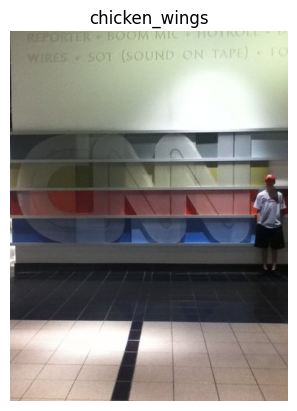

In [6]:
img = view_random_image(train_dir, target_class=random.choice(class_names))

## 2. Preprocess the data

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#preprocess data(get all pixel values between 0-1 [Scaling/Normalization])

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode="categorical",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode="categorical",
                                               seed=42)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Build a model

In [10]:
#build a cnn model (tiny-VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation="relu",
        input_shape=(224,224,3)
    ),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

#compile CNN
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
235/235 [==============================] - 34s 134ms/step - loss: 2.1296 - accuracy: 0.2240 - val_loss: 1.9607 - val_accuracy: 0.3160
Epoch 2/5
235/235 [==============================] - 28s 121ms/step - loss: 1.8378 - accuracy: 0.3691 - val_loss: 1.8400 - val_accuracy: 0.3556
Epoch 3/5
235/235 [==============================] - 27s 117ms/step - loss: 1.4967 - accuracy: 0.5016 - val_loss: 1.9145 - val_accuracy: 0.3268
Epoch 4/5
235/235 [==============================] - 29s 122ms/step - loss: 0.9513 - accuracy: 0.6911 - val_loss: 2.2629 - val_accuracy: 0.3280
Epoch 5/5
235/235 [==============================] - 27s 116ms/step - loss: 0.4090 - accuracy: 0.8725 - val_loss: 3.1375 - val_accuracy: 0.3052


## 5. Evaluate the model

In [14]:
model_1.evaluate(valid_data)

79/79 [==============================] - 7s 91ms/step - loss: 3.1375 - accuracy: 0.3052


[3.1374831199645996, 0.3052000105381012]

In [11]:
# plot the validation and training curves seperately (can also use tensorboard callback in fit function)
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"]))
  #plt loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  #plt accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_acc")
  plt.plot(epochs, val_accuracy, label="val_acc")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

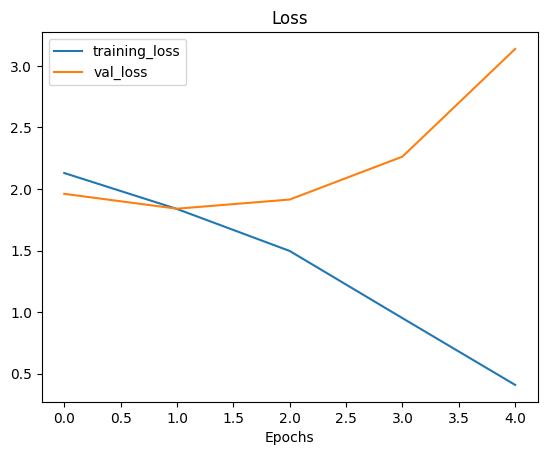

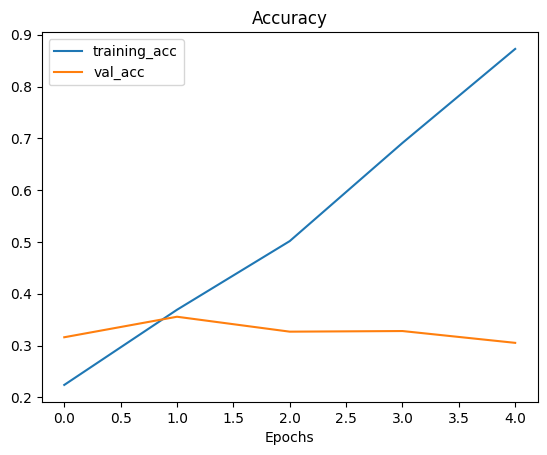

In [12]:
plot_loss_curves(history_1) #OVERFITTING

## Adjust hyperparams to beat baseline

In [15]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation="relu",
        input_shape=(224,224,3)
    ),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

#compile CNN
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [16]:
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
235/235 [==============================] - 31s 121ms/step - loss: 2.1071 - accuracy: 0.2573 - val_loss: 1.9430 - val_accuracy: 0.3204
Epoch 2/5
235/235 [==============================] - 26s 113ms/step - loss: 1.6590 - accuracy: 0.4429 - val_loss: 1.8797 - val_accuracy: 0.3324
Epoch 3/5
235/235 [==============================] - 32s 137ms/step - loss: 1.1603 - accuracy: 0.6243 - val_loss: 2.0140 - val_accuracy: 0.3492
Epoch 4/5
235/235 [==============================] - 37s 159ms/step - loss: 0.6958 - accuracy: 0.7905 - val_loss: 2.3839 - val_accuracy: 0.3040
Epoch 5/5
235/235 [==============================] - 32s 135ms/step - loss: 0.3538 - accuracy: 0.9095 - val_loss: 2.8623 - val_accuracy: 0.3084


In [17]:
#check summaries! not many params difference! no improvement!

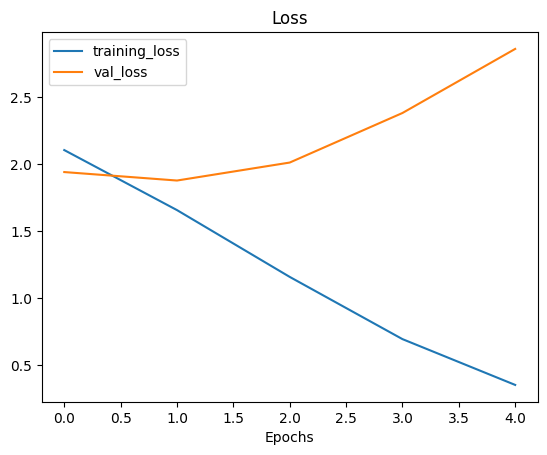

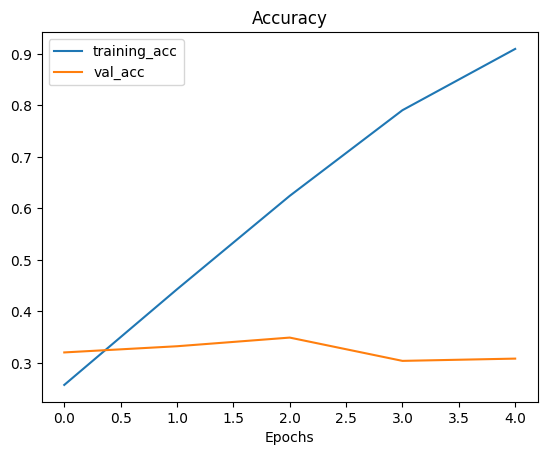

In [18]:
plot_loss_curves(history_2)

FAILED EXPERIMENT!

## Data aug

In [19]:
tf.random.set_seed(42)

#preprocess data(get all pixel values between 0-1 [Scaling/Normalization])

train_datagen_aug = ImageDataGenerator(rescale=1./255,
                                   rotation_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255)

#import data from directories and turn it into batches
train_data_aug = train_datagen_aug.flow_from_directory(directory=train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode="categorical",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode="categorical",
                                               seed=42)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [21]:
#clone the model
model_3 = tf.keras.models.clone_model(model_1)

model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [22]:
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

In [23]:
history_3 = model_3.fit(train_data_aug,
                        epochs=5,
                        steps_per_epoch = len(train_data_aug),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
235/235 [==============================] - 112s 463ms/step - loss: 2.2240 - accuracy: 0.1647 - val_loss: 2.1352 - val_accuracy: 0.1968
Epoch 2/5
235/235 [==============================] - 105s 446ms/step - loss: 2.0868 - accuracy: 0.2459 - val_loss: 1.9477 - val_accuracy: 0.3164
Epoch 3/5
235/235 [==============================] - 114s 484ms/step - loss: 1.9939 - accuracy: 0.2972 - val_loss: 1.8973 - val_accuracy: 0.3624
Epoch 4/5
235/235 [==============================] - 125s 532ms/step - loss: 1.9483 - accuracy: 0.3199 - val_loss: 1.8306 - val_accuracy: 0.3728
Epoch 5/5
235/235 [==============================] - 132s 564ms/step - loss: 1.9259 - accuracy: 0.3236 - val_loss: 1.9568 - val_accuracy: 0.3296


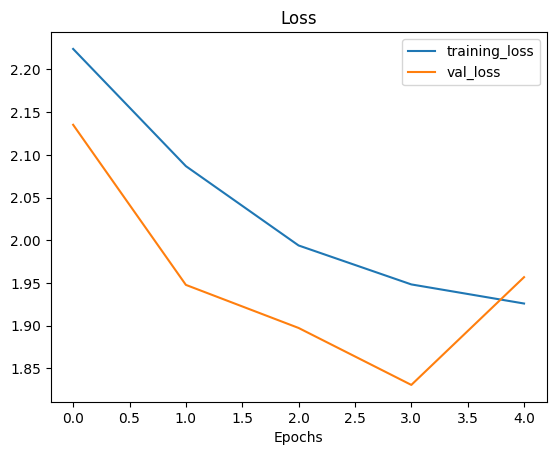

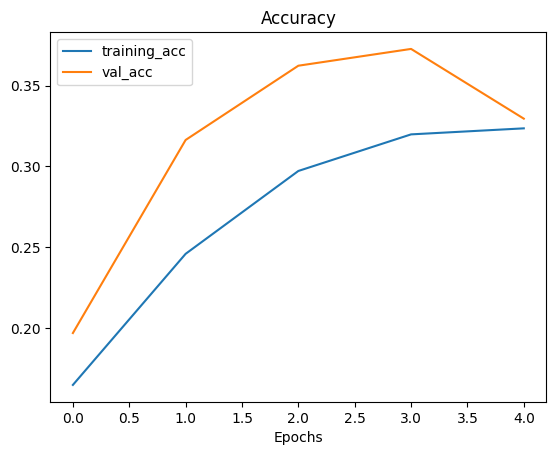

In [24]:
plot_loss_curves(history_3)

## Making pred on custom image!

In [25]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [26]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg

--2024-05-18 23:47:14--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1725178 (1.6M) [image/jpeg]
Saving to: ‘03-sushi.jpeg’

03-sushi.jpeg       100%[===================>]   1.64M  --.-KB/s    in 0.01s   

2024-05-18 23:47:15 (144 MB/s) - ‘03-sushi.jpeg’ saved [1725178/1725178]

--2024-05-18 23:47:15--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 

In [33]:
def load_prep_image(filename, img_shape=224):
  """
  Reads an image from filename and turns it into tensor and reshapes it

  """

  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, [img_shape, img_shape])
  img = img/255.
  img = tf.expand_dims(img, axis=0)
  return img

def pred_and_plot(model, filename, class_names=list(class_names)):
  """
  impotts an imahe located at filename, preprocess it
  make a pred with model
  plot the image and pred
  """
  img = load_prep_image(filename)
  pred = model.predict(img)
  #add logic for multiclass
  if len(pred[0])>1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]
  plt.imshow(tf.squeeze(img))
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 95ms/step


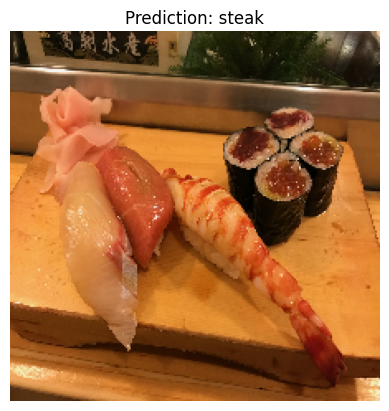

In [34]:
pred_and_plot(model_3, "03-sushi.jpeg")

1/1 [==============================] - 0s 17ms/step


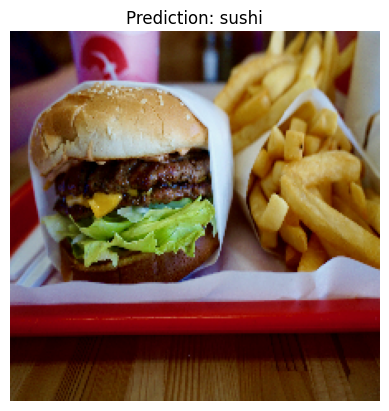

In [35]:
pred_and_plot(model_3, "03-hamburger.jpeg")

Looks like model didnt perform very well on custom images. Poor accuracy

## Saving and loading the model

In [36]:
# save model
model_3.save("saved_model_3")

In [37]:
loaded_model_3 = tf.keras.models.load_model("saved_model_3")
loaded_model_3.evaluate(valid_data)

79/79 [==============================] - 11s 134ms/step - loss: 1.9568 - accuracy: 0.3296


[1.9567800760269165, 0.3296000063419342]

In [38]:
model_3.evaluate(valid_data)

79/79 [==============================] - 8s 95ms/step - loss: 1.9568 - accuracy: 0.3296


[1.9567803144454956, 0.3296000063419342]